In [1]:
format compact 

# I- Problème

Considérant un système dynamique défini par sa focntion de transfert en boucle ouverte suivante: 
$$ \mathbf{G(s)} = \frac{1}{s(s+2)}  $$ 

La réponse en boucle fermée du notre système, ne pésente pas de dépassement. Le temps de réponse à $5\%$ ne doit pas dépasser le $0.2$ secondes, tout en garantissant une erreur statique nulle pour une excitation en échelon.

# II- Synthèse du correcteur et méthodologie

D'abord, on note que le système est instable en boucle ouvert puisque, il comporte un intégrateur. D'où, la nécessité de synthétiser un correcteur pour garantir la stabilité du système en boucle fermée.
Toutefois, pour un problème de poursuite d'une consigne en échelon on n'as pas besoin de synthétiser un correcteur avec une action intégrale.

On va essayer de synthétiser un correcteur (PD) Proportionnel-Dérivateur $C(s)=K_p(1+T_ds), K_p \gt 0, T_d \gt 0$.

On commence par traduire le cahier de charge en une focntion de transfert  traduisant le comportement souhaité du système en boucle fermée. Le cahier de charge stipule une réponse sans dépassment. Une fonction de transfert du premier ordre garantit une réponse en boucle fermée sans dépassement, soit:
$$\mathbf{{F_{ref}}(s)} = \frac{k}{1+\tau s} $$


L'erreur statique nulle souhaitée impose un gain statique de valeur $k=1$, de la focntion du transfert de reference.
Il reste à calculer $\tau$, la constante du temps à partir du temps de réponse desirée.
On sait que pour un système du premier ordre on a $tr_{5\%}=3\tau$.
Soit finalement $\tau= 0.067$. et la focntion du transfert devient.

$$\mathbf{{F_{ref}}(s)} = \frac{1}{1+0.067 s} $$

### II-1-2 Calcul de K_p et T_d

Pour le calcul de ce deux inconnues, commençant par calculer la fonction du transfert de notre système en boucle fermée.
Remarquons d'abords que notre fonction du transfert du système initiale $\mathbf{G(s)}$ peut se mettre sous cette forme:
$$ \mathbf{G(s)} = \frac{0.5}{s(1+0.5s)}  $$ 

et notre fonction du transfert en boucle fermée peut s'écrire maintenant:
$$ \mathbf{F(s)} = \frac{C(s)G(s)}{1+C(s)G(s)}  $$ 

soit en remplaçant,
$$ \mathbf{F(s)} = \frac{K_p(1+T_ds)\frac{0.5}{s(1+0.5s)}}{1+K_p(1+T_ds)\frac{0.5}{s(1+0.5s)}}  $$ 

Pour se ramener à un système du premier ordre, on va compenser le pole en $p_1=-2$, ce qui équivaut à imposer $$1+T_ds=1+0.5s$$

Aprés simplification, on obtien:
$$ \mathbf{F(s)} = \frac{1}{1+\frac{2}{K_p}s}  $$
En imposant, $\mathbf{F(s)} = \mathbf{{F_{ref}}(s)}$, on aura :
$$1+0.067s=1+\frac{2}{K_p}s$$

les deux équations $9$ et $7$, nous permettent de déduire les valeurs cherchées de $K_p=29.85$ et $T_d=0.5$

### II-1-3 Version finale de notre correcteur

Le synthèse de notre corretceur PD, n'est pas fini, en fait le correcteur PD est irréalisable physiquement, puisque il n'est pas causale.
Une solution consite à filtrer l'action dérivée avec un filtre passe-bas. Ca consite à l'ajout d'un pole, dont en prends le soin qu'il soit négligeable par rapport aux poles de la fonction du transfert en bouvle fermée. La forme de notre correcteur aura cette forme:
$$\mathbf{C(s)}=K_p(1+\frac{T_ds}{1+\frac{T_ds}{N}})$$ 

Avec: $N$ une constante de Filtrage, generalement choisi entre $5$ et $30$.
Pour les imulatioons on fait le choix de $N=30$

# III- Simulations 
## III -1 En boucle Ouvert

In [2]:
g=tf([1],[1,2,0])


g =
 
      1
  ---------
  s^2 + 2 s
 
Continuous-time transfer function.




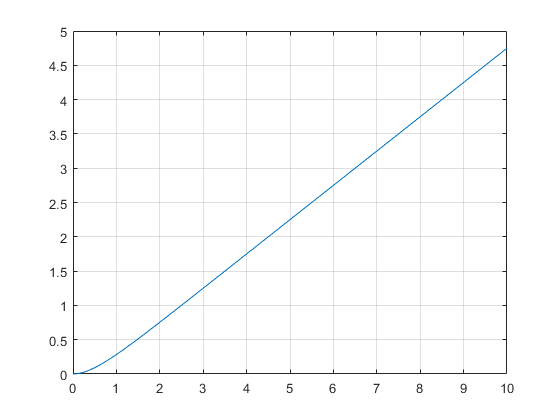

In [3]:
t=0:0.1:10;
y=step(g,t);
plot(t,y)
grid on

## III-1 En boucle fermée

la fonction Matlab $pidstd$ permet d'obtenir le correcteur avec les parametres calculées. pour le $inf$ ça correspond à une valeur infini de la constante du temps de l'action intégrale. Ce qui marque l'abscence de cette action dans notre correcteur.

In [4]:
PD = tf(pidstd(29.85,inf,0.5,30)) 


PD =
 
  925.4 s + 1791
  --------------
      s + 60
 
Continuous-time transfer function.




In [5]:
f1=(PD*g)/(1+PD*g)


f1 =
 
         925.4 s^4 + 5.916e04 s^3 + 222084 s^2 + 214920 s
  ---------------------------------------------------------------
  s^6 + 124 s^5 + 5009 s^4 + 7.404e04 s^3 + 236484 s^2 + 214920 s
 
Continuous-time transfer function.




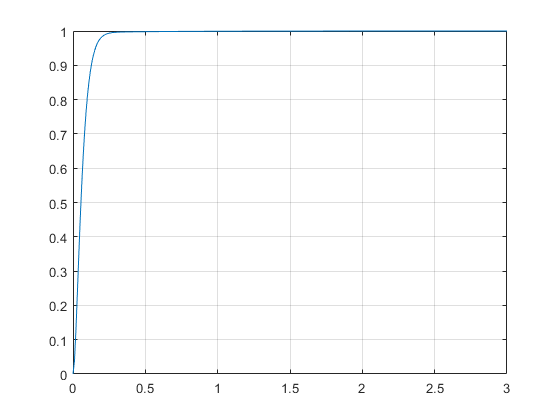

In [6]:
t=0:0.01:3;
y=step(f1,t);
plot(t,y)
grid on

In [7]:
S = stepinfo(f1,'SettlingTimeThreshold',0.05)

S = 
  struct with fields:

        RiseTime: 0.1092
    SettlingTime: 0.1548
     SettlingMin: 0.9016
     SettlingMax: 0.9980
       Overshoot: 0
      Undershoot: 0
            Peak: 0.9980
        PeakTime: 0.4891



# IV- Conclusion

Avec un correcteur PD, on arrive à satisfaire le cahier de charge.